In [1]:
import time
import numpy as np

from astropy.time import Time   # Astropy 4.1rc1 is used

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from orbitdeterminator.doppler.utils.utils import *
from orbitdeterminator.doppler.utils.utils_aux import *
from orbitdeterminator.doppler.utils.utils_vis import *

%matplotlib inline

np.random.seed(100)
np.set_printoptions(precision=2)

x_0, t_sec, x_sat_orbdyn_stm, x_obs_multiple, _ = get_example_scenario(id=3, frame='teme')

print((x_obs_multiple.shape))

# Define measurements
r_1, rr_1 = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple[:,:,0])
r_2, rr_2 = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple[:,:,1])
r_3, rr_3 = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple[:,:,2])
z_rr_1 = np.expand_dims(rr_1, axis=0)       # Range rate measurements
_, z_rr_multiple = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple)
z_x_sat = x_sat_orbdyn_stm                  # Full state measurements

font = {'size': 16}
matplotlib.rc('font', **font)


(6, 240, 4)


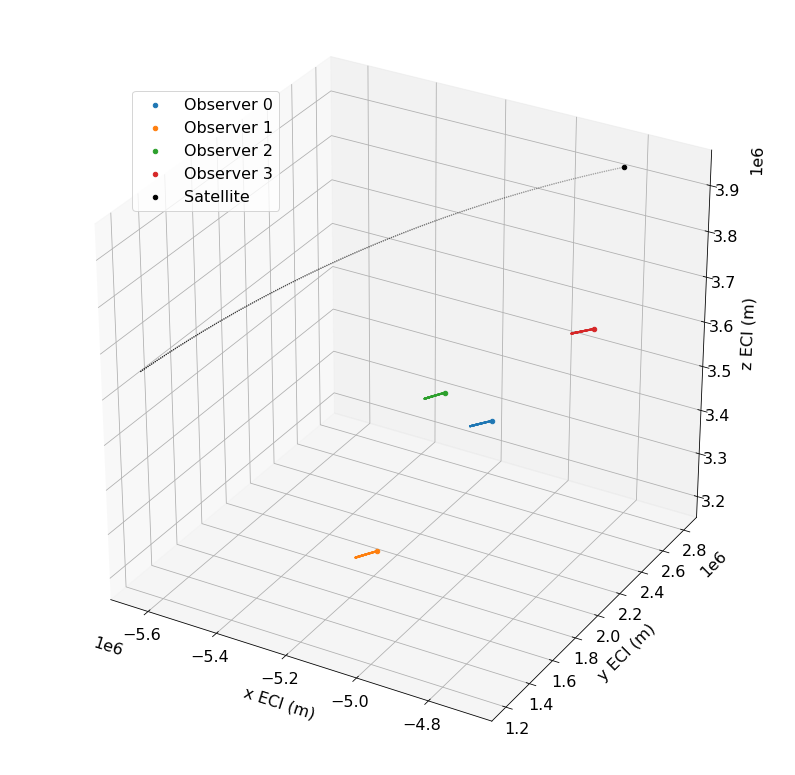

In [2]:
fig1 = plot_example_3d(x_sat_orbdyn_stm, x_obs_multiple)

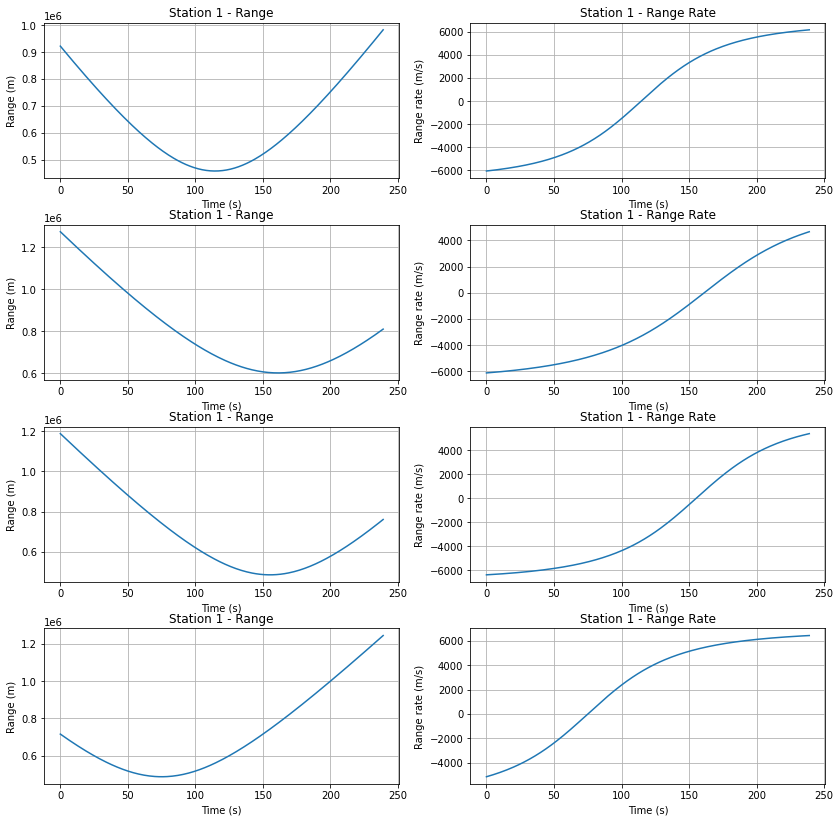

In [2]:
fig2 = plot_range_range_rate(x_sat_orbdyn_stm, x_obs_multiple, t_sec)

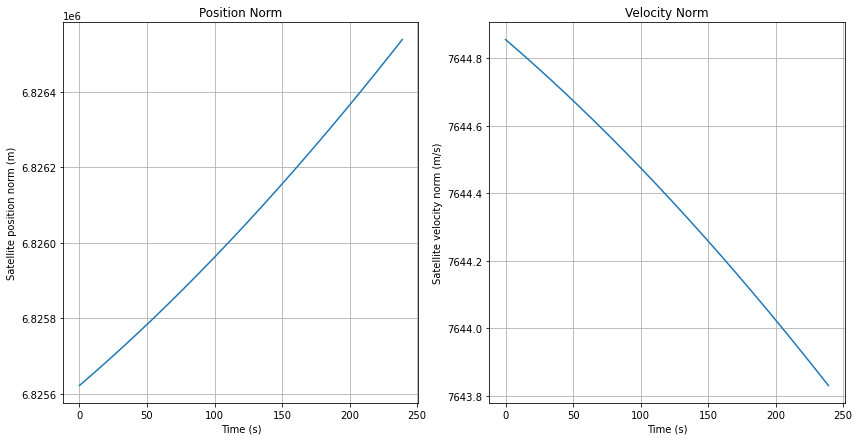

In [3]:
fig3 = plot_pos_vel_norms(x_sat_orbdyn_stm, t_sec)

In [5]:
# Matrices
R_rr_1 = np.eye(1)*1e-6       # Measurement uncertainty range rate (1x1)
R_rr = np.eye(x_obs_multiple.shape[2])*1e-6       # Measurement uncertainty range rate (array)
R_x_sat = np.eye(6)*1e-12     # Measurement uncertainty full state

P_small = np.eye(6)*1e-6                         # Initial state uncertainty - small
P = np.diag([1e4, 1e4, 1e4, 1e2, 1e2, 1e2])      # Initial uncertainty - random guess
P = np.diag([1,1,1,1,1,1])*1e8      # Initial uncertainty - random guess

# Random sampling
n_samples = 500
x_0r = np.random.multivariate_normal(x_0.squeeze(), P, n_samples).T
x_0err = x_0r - x_0

verbose = False

start_time = time.time()
#####   Batch Test 2_1 - Range rate, random samples, multiple measurements     #####
run_batch_2_1 = True
if run_batch_2_1 == True:     

    x_br = np.zeros(x_0r.shape)
    x_berr = np.zeros(x_0r.shape)
    if verbose:
        print(f"Batch 2_1 Output:")

    for i in range(n_samples):
        
        print(i)    # Temp

        x_b, output = batch(
            np.copy(np.expand_dims(x_0r[:,i], axis=1)), P, R_rr, z_rr_multiple, t_sec, x_obs_multiple, 
            f_obs=f_obs_range_rate, tolerance=1e-8, max_iterations=250)
        x_br[:,i] = x_b.squeeze()
        x_berr[:,i] = (x_0 - x_b).squeeze()
        x_berr1 = (x_0 - x_b).T

        if verbose:
            print(f"{i} Number of iterations", output['num_it'])
            print(f"err_1: \t{x_0err[:,i]}, Norm pos {np.linalg.norm(x_0err[0:3,i])}, \
                Norm vel {np.linalg.norm(x_0err[3:6,i])}")
            print(f"err_2: \t{x_berr1}, Norm pos {np.linalg.norm(x_berr1[0:3])}, \
                Norm vel {np.linalg.norm(x_berr[3:6])}")

print(f"Elapsed {(time.time()-start_time):.2f} s")


0
Singular matrix exception.
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Singular matrix exception.
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
Singular matrix exception.
34
35
36
Singular matrix exception.
37
38
39
40
41
42
43
44
45
Singular matrix exception.
46
47
48
49
50
Singular matrix exception.
51
52
53
54
55
56
57
Singular matrix exception.
58
59
60
61
62
63
64
Singular matrix exception.
65
66
67
68
Singular matrix exception.
69
70
71
Singular matrix exception.
72
73
Singular matrix exception.
74
75
76
77
78
Singular matrix exception.
79
80
81
82
83
Singular matrix exception.
84
Singular matrix exception.
85
86
87
88
89
90
91
Singular matrix exception.
92
93
94
Singular matrix exception.
95
96
97
98
Singular matrix exception.
99
Singular matrix exception.
100
101
102
103
104
105
106
107
108
109
110
111
112
Singular matrix exception.
113
114
115
Singular matrix exception.
116
117
118
119
120
121
Singular matrix exception.
122
123
124
125
126
Singular matrix exception.
127
128


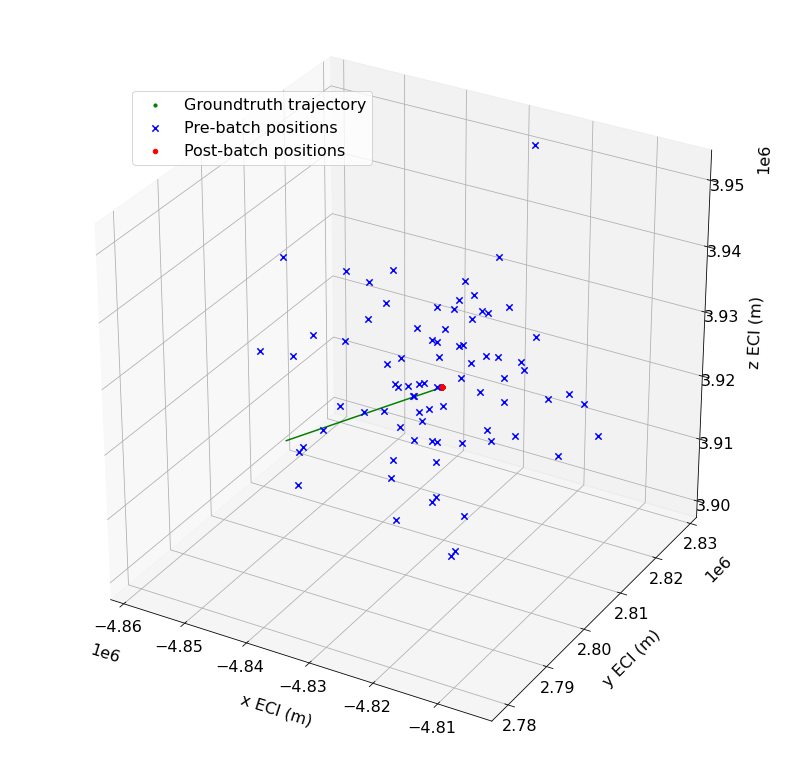

In [6]:
fig = plot_batch_results(x_sat_orbdyn_stm, x_0r, x_br, x_berr)